In [1]:
import numpy as np
import math
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [2]:
%cd /content/drive/'My Drive'/'卒業研究'/'python_code_for_research'/'sparse-modeling-master'
path='My Drive/卒業研究/python_code_for_research/sparse-modeling-master'

/content/drive/My Drive/卒業研究/python_code_for_research/sparse-modeling-master


In [3]:
#係数行列作成
a1 =np.array([1,0,0,1,0,0,1,0,0])*10
a2 =np.array([(2/6)*np.sqrt(10),0,0,(1/6)*np.sqrt(10),(1/6)*np.sqrt(10),0,0,(2/6)*np.sqrt(10),0])*10
a3 = np.array([(3/12)*np.sqrt(13),(1/12)*np.sqrt(13),0,0,(4/12)*np.sqrt(13),0,0,(1/12)*np.sqrt(13),(3/12)*np.sqrt(13)])*10
a4 = np.array([0,(2/6)*np.sqrt(10),0,(1/6)*np.sqrt(10),(1/6)*np.sqrt(10),0,(2/6)*np.sqrt(10),0,0])*10
a5 = np.array([0,1,0,0,1,0,0,1,0])*10
a6 = np.array([0,(2/6)*np.sqrt(10),0,0,(1/6)*np.sqrt(10),(1/6)*np.sqrt(10),0,0,(2/6)*np.sqrt(10)])*10
a7 = np.array([0,(1/12)*np.sqrt(13),(3/12)*np.sqrt(13),0,(4/12)*np.sqrt(13),0,(3/12)*np.sqrt(13),(1/12)*np.sqrt(13),0])*10
a8 = np.array([0,0,(2/6)*np.sqrt(10),0,(1/6)*np.sqrt(10),(1/6)*np.sqrt(10),0,(2/6)*np.sqrt(10),0])*10
a9 = np.array([0,0,1,0,0,1,0,0,1])*10

#結合
A1= np.vstack([a1,a2,a3,a4,a5,a6,a7,a8,a9])
#print(A1)

#密度長に変換
aa = A1[:,4]*2500
ab = A1[:,0:4]*2000
ac = A1[:,5:]*2000
ad = np.insert(ab,4,aa,axis=1)
y = np.hstack([ad,ac])
#print(y)

In [4]:
#yの各行の和を計算
y_observation = y.sum(axis=1)

In [5]:
#total_variation_係数式（変換式）
def variation(npara,mdata):
    B=np.zeros((npara,mdata))
    for i in range(npara):
      for j in range(mdata):
        if i==j:
          B[i][j]=-1
        elif j==i+1:
          B[i][j]=1
        else:
          B[i][j]=0
          B[npara-1][mdata-1]=1
    return B

[[-1.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. -1.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. -1.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. -1.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. -1.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. -1.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0. -1.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. -1.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. -1.]]


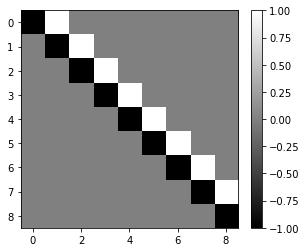

In [6]:
#初期辞書_total_variation
B=variation(9,9)
print(B)
mdata, npara = B.shape
plt.imshow(B, cmap='gray', interpolation='Nearest')
plt.colorbar(fraction=0.1, pad=0.04)

[[ 0.062  0.231 -0.178  0.21   0.123 -0.289 -0.259 -0.37   0.442]
 [ 0.016  0.178  0.58  -0.151  0.485  0.445 -0.337  0.428 -0.381]
 [ 0.564 -0.21   0.168 -0.626  0.054  0.284 -0.125  0.346  0.184]
 [ 0.675  0.268  0.092 -0.233 -0.701 -0.369  0.118 -0.146 -0.243]
 [-0.117 -0.076  0.328  0.084  0.436  0.016  0.025 -0.107 -0.355]
 [ 0.187 -0.048 -0.447  0.326  0.026 -0.566  0.459  0.161 -0.275]
 [-0.401  0.468 -0.105  0.257  0.053 -0.366  0.126  0.627  0.602]
 [ 0.066 -0.736  0.502 -0.166  0.197  0.216  0.078  0.194  0.034]
 [ 0.087  0.172  0.157  0.529 -0.15  -0.028  0.746 -0.266  0.043]]


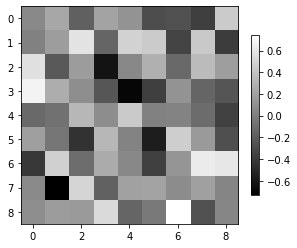

In [7]:
#初期辞書をランダムに
A0 = np.random.randn(9, 9)
A0 = np.dot(A0, np.diag(1. / np.sqrt(np.diag(np.dot(A0.T, A0)))))
print(np.round(A0,decimals=3))

plt.imshow(A0, cmap='gray', interpolation='Nearest')
plt.colorbar(fraction=0.024, pad=0.04)

In [8]:
from sklearn.decomposition import SparseCoder
from sklearn.decomposition import DictionaryLearning
from sklearn.utils.fixes import np_version
from time import time

[[ 0.      0.      0.      0.     -0.7071  0.7071  0.      0.      0.    ]
 [ 0.      0.      0.      0.7071 -0.7071  0.      0.      0.      0.    ]
 [-0.7071  0.7071  0.      0.      0.      0.      0.      0.      0.    ]
 [ 0.      0.      0.      0.      0.     -0.7071  0.7071  0.      0.    ]
 [-0.2947  0.4144  0.0968  0.3715  0.3973  0.0923  0.441  -0.0242 -0.4822]
 [ 0.      0.     -0.7071  0.7071  0.      0.      0.      0.      0.    ]
 [ 0.0133 -0.4463  0.1111  0.0826 -0.0622 -0.1381  0.545   0.1938  0.6511]
 [-0.1802  0.091  -0.6767  0.5958  0.0341  0.1846  0.3254 -0.0168 -0.0701]
 [-0.4509  0.0263  0.4052  0.3055 -0.32    0.2549 -0.509  -0.2703  0.1974]]


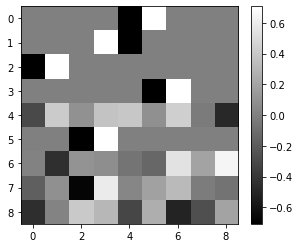

In [9]:
dl=DictionaryLearning()
V_totalvariation_fit=dl.fit(B)

#辞書を計算
V_totalvariation_components=np.round(V_totalvariation_fit.components_,decimals=4)
print(V_totalvariation_components)
plt.imshow(V_totalvariation_components, cmap='gray', interpolation='Nearest')
plt.colorbar(fraction=0.1, pad=0.04)

#保存
np.save('totalvariation_dictionary.npy',V_totalvariation_components)

[[ 0.          0.          0.          0.          0.          0.
   0.          0.          1.41421356]
 [ 0.          0.          0.          1.41421356  0.          0.
   0.          0.          0.        ]
 [-0.99004137  0.          0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.          0.          0.          0.         -1.41421356  0.
   0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
  -1.41421356  0.          0.        ]
 [ 0.          0.          0.          0.          0.         -1.41421356
   0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.70710678
   0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          1.41421356  0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.         -0.70710678  0.        ]]


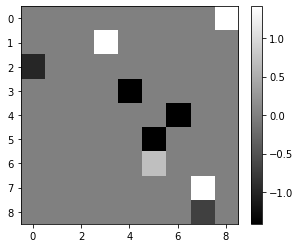

In [10]:
#transform
V_totalvariation_transform=dl.fit_transform(B)#Bを変換
print(V_totalvariation_transform)
V_img=plt.imshow(V_totalvariation_transform, cmap='gray', interpolation='Nearest')
plt.colorbar(fraction=0.1, pad=0.04)

[[-1.400e-02 -1.578e-01 -5.155e-01  1.342e-01 -4.312e-01 -3.952e-01
   2.997e-01 -3.804e-01  3.384e-01]
 [ 5.893e-01  2.339e-01  7.980e-02 -2.034e-01 -6.121e-01 -3.224e-01
   1.031e-01 -1.276e-01 -2.116e-01]
 [ 2.845e-01  1.631e-01 -6.858e-01  1.470e-01  4.517e-01 -2.026e-01
  -1.808e-01 -3.501e-01  1.460e-02]
 [-5.543e-01  2.182e-01  2.214e-01 -1.919e-01  3.384e-01  3.061e-01
   1.600e-03 -3.618e-01  4.691e-01]
 [ 4.714e-01 -2.671e-01  2.215e-01  4.790e-01  1.870e-02  4.690e-01
  -3.993e-01  1.651e-01 -1.449e-01]
 [-5.340e-02 -1.915e-01  6.000e-04 -4.214e-01 -3.028e-01  5.769e-01
   4.602e-01  3.644e-01 -1.178e-01]
 [-3.047e-01 -3.493e-01  1.010e-02 -2.306e-01  3.207e-01  3.365e-01
   5.996e-01  6.990e-02  3.891e-01]
 [ 4.438e-01 -8.020e-02 -1.566e-01 -5.075e-01  3.492e-01  6.410e-02
   1.064e-01 -2.325e-01 -5.684e-01]
 [-1.050e-02  6.590e-02 -6.911e-01 -1.560e-01 -1.183e-01 -3.400e-03
   6.294e-01  2.403e-01  1.602e-01]]


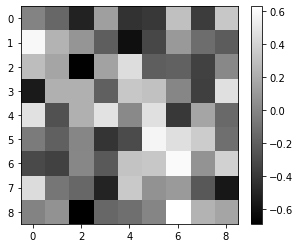

In [11]:
#初期辞書ランダムver
V_random=dl.fit(A0)
V_random_components=np.round(V_random.components_,decimals=4)
print(V_random_components)
V_random_img=plt.imshow(V_random_components, cmap='gray', interpolation='Nearest')
plt.colorbar(fraction=0.1, pad=0.04)
np.save('V_random_dictionary',V_random_components)

[[ 0.          0.          0.          0.         -0.552612    0.
   0.          0.          0.        ]
 [-1.1252999   0.          0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.          0.          0.          0.55105134  0.          0.
   0.          0.          0.        ]
 [ 0.          1.14599279  0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.         -0.46414382]
 [ 0.          0.          0.          0.          0.          0.
   0.         -0.655396    0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.73290499]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.         -0.54981064]
 [ 0.          0.         -0.61629739  0.          0.          0.
   0.          0.          0.        ]]


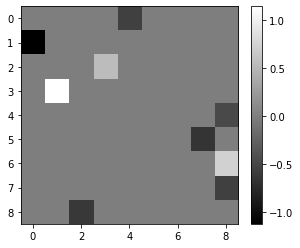

In [12]:
#transform
V_random_transform=dl.fit_transform(A0)#A0を変換
print(V_random_transform)
V_img=plt.imshow(V_random_transform, cmap='gray', interpolation='Nearest')
plt.colorbar(fraction=0.1, pad=0.04)

In [14]:
def soft_threshold(x, lam):
    for k in range(len(x)):
        if x[k] > lam:
            x[k] = x[k] - lam
        elif x[k] < -lam:
            x[k] = x[k] + lam
        else:
            x[k] = 0
    return np.array(x)

In [15]:
#変換行列がある時ない時で共通にする
def admm(jac,ff,lamda,mu,itmax,B=None):
    mdata, npara = jac.shape
    I=np.eye(mdata,npara)
    xx = np.array([0 for i in range(npara)],dtype='f8')#未知数
    zz = np.array([0 for i in range(npara)],dtype='f8')#要素間の差
    uu = np.array([0 for i in range(npara)],dtype='f8')#ラグランジュの未定乗数

    if B.all()==None:
      jac1=mu*I+(np.dot(jac.T,jac))/lamda
      jac2=np.linalg.inv(jac1)
      for i in range(itmax):
        xx = np.dot(jac2,(np.dot(jac.T,ff)/lamda+mu*(zz-uu)))
        zz = soft_threshold(xx+uu,1/mu)
        uu = uu+xx-zz
        xx = xx.reshape(np.sqrt(mdata).astype('int64'),np.sqrt(npara).astype('int64'))

    else:#変換行列あり
      jac1=mu*np.dot(B.T,B)+(np.dot(jac.T,jac))/lamda
      jac2=np.linalg.inv(jac1)
      
      for i in range(itmax):
        xx = np.dot(jac2,(np.dot(jac.T,ff)/lamda+mu*np.dot(B.T,(zz-uu))))
        zz = soft_threshold(np.dot(B,xx)+uu,1/mu)
        uu = uu+xx-zz
        xx = xx.reshape(np.sqrt(mdata).astype('int64'),np.sqrt(npara).astype('int64'))
        
    return xx,zz,uu

In [16]:
#totalvariationの辞書で再構成
total_dic=admm(A1,y_observation,0.01,0.0001,5,B=V_totalvariation_transform)
total_dic

(array([[ 43023.99768066,  33778.75485229,  24533.51187134],
        [-34004.62028503, -15014.13463211,   2976.35134888],
        [ -3019.37741089, -12264.62005615, -21509.86315918]]),
 array([ 10513.73228118,      0.        ,      0.        ,      0.        ,
             0.        ,      0.        ,      0.        , -14815.39466471,
             0.        ]),
 array([ 83443.53788517,  77952.11361694,  60400.16525269, -62433.35786438,
        -24829.46103668,   7774.4359436 ,  -3070.70410156,  -4919.82803539,
        -38174.60101318]))

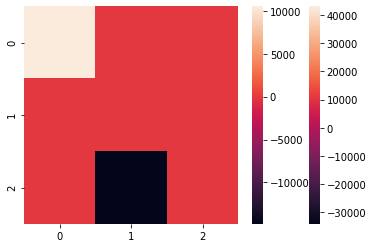

In [18]:
sns.heatmap(total_dic[0].reshape(3,3))
sns.heatmap(total_dic[1].reshape(3,3))

In [17]:
#普通のtotal_variationで変換
total_normal=admm(A1,y_observation,0.01,0.0001,5,B=B)
total_normal

(array([[ 13776.99462891,   2847.81262207,  -8081.36962891],
        [-22922.17141724,   -563.80767822,  20794.55630493],
        [ 15145.17675781,   4215.99438477,  -6713.18713379]]),
 array([6959.64233398,  996.67980957,    0.        ,    0.        ,
        6459.69778442,    0.        ,    0.        ,    0.        ,
           0.        ]),
 array([ 34706.17663574,  23776.99487305,   5386.4263916 , -48014.25244141,
        -11922.17166138,  32089.30664062,  32576.04553223,  12550.15441895,
         -7475.73339844]))

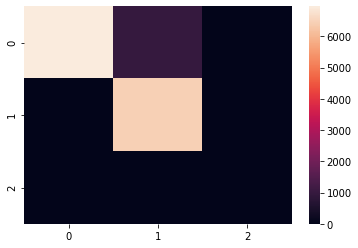

In [19]:
sns.heatmap(total_normal[1].reshape(3,3))

In [20]:
#変換行列をランダムの再構成辞書
random_dic=admm(A1,y_observation,0.01,0.0001,5,B=V_random_transform)
random_dic

(array([[-12227.67718506,  -1451.95596313,   9323.76550293],
        [ 15601.22702026,  -5450.21569824, -27501.65966797],
        [  2626.45007324,  13402.17163086,  24177.89355469]]),
 array([ -402.6136585 ,     0.        ,     0.        ,  8753.94863222,
            0.        ,     0.        , 11469.47611244,     0.        ,
         9701.63346843]),
 array([-25239.53178828, -10321.53141022,   4999.08343506,  27265.15808775,
          7877.87683105, -25263.35717773,  -5093.6486882 ,  34943.65478516,
         39924.1058683 ]))

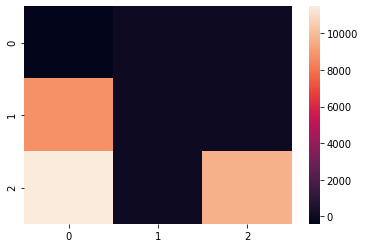

In [21]:
sns.heatmap(random_dic[1].reshape(3,3))

In [22]:
def OMP(A, b, k0, eps):
    """ 
    直交マッチング追跡(orthogonal matching pursuit; OMP) 
    A nxm行列
    b n要素の観測
    k0 xの非ゼロの要素数
    eps 誤差の閾値
    """
    # 初期化
    x = np.zeros(A.shape[1])
    S = np.zeros(A.shape[1], dtype=np.uint8)
    r = b.copy()
    rr = np.dot(r, r)
    for _ in range(k0):
        # 誤差計算
        err = rr - np.dot(A[:, S == 0].T, r) ** 2
            
        # サポート更新
        ndx = np.where(S == 0)[0]
        S[ndx[err.argmin()]] = 1
    
        # 解更新
        As = A[:, S == 1]
        pinv = np.linalg.pinv(np.dot(As, As.T))
        x[S == 1] = np.dot(As.T, np.dot(pinv, b))
        
        # 残差更新
        r = b - np.dot(A, x)
        rr = np.dot(r, r)
        if rr < eps:
            break
            
    return x, S

In [13]:
sp=SparseCoder(dictionary=V_totalvariation_components)